# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [146]:
import pandas as pd
import io
import numpy as np
import datetime as dt
import time
import csv
import tweepy
from tweepy import OAuthHandler
import json
import re
import requests
import string

#load `twitter_archive_ehnhanced.csv` file

arc_ehn = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)    

#save the tsv file
with open ("image-predictions.tsv", mode="wb") as file:
    file.write(response.content)

#load file into a dataframe
img_prd = pd.read_csv ("image-predictions.tsv", sep ='\t')


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Read the required contents fromthe created .txt file 

df = []
with open('tweet-json.txt') as f:
    for line in f:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})

#extra data       
ext_data = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 
                                'favorite_count', 'create_date'])


,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assessment

In [5]:
# twitter_archive_ehnhanced
arc_ehn

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
# image-predictions.tsv
img_prd

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
# extra data (tweets_json.txt)
ext_data

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015


### Programmatic assessment

In [8]:
# archive enhanced
arc_ehn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
arc_ehn.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# checking for duplicate values 
arc_ehn.tweet_id.duplicated().sum()

0

In [11]:
arc_ehn.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [84]:
# checking all names 
arc_ehn.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [20]:
# Unique value and counts of doggo
arc_ehn.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
# Unique value and counts of floofer
arc_ehn.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
# Unique value and counts of pupper
arc_ehn.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
# Unique value and counts of puppo
arc_ehn.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [31]:
# Unique value and counts of tweets sources
arc_ehn.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
img_prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
img_prd.tweet_id.duplicated().sum()

0

In [14]:
img_prd.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
# Look for instances of duplicates
img_prd.duplicated().value_counts()


False    2075
dtype: int64

In [27]:
# extra data (retweets and favorites counts)
ext_data[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [28]:
ext_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   create_date     2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


### Quality issues

> **Twitter archive**:
>1. Inaccurate data values in `name` column : a, an. the, mad etc. (are all in lower case)
2. `tweet_id` column data type should be str not int
3. `source`column data has unrequired HTML code
4. `timestamp` datatype is str instead of datetime format
5. Some tweets are retweets or replies (which are not needed) 

> **Image Prediction**:
>1. `tweet_id` column data type should be str not int
2. some dog breed name starts with upper case. others lower case ( for `p1, p2, and p3` columns)
3.  underscore '_' present in some dog breed names instead of white space ' '

> **Extra data**:
>1. `tweet_id` column datatype is int. it should be str
2. `create_date` column datatype is incorrect

### Tidiness issues
> **Twitter archive**:
>1. Stages of dog category have seprate columns : `doggo`, `floofer`, `pupper`, `puppo`.

> **Extra data**:
>1. `retweet_count`, and `favorite_count` column is separated from the main dataset

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [108]:
# Make copies of original datframes
arc_clean = arc_ehn.copy()
prd_clean = img_prd.copy()
rt_fc_clean = ext_data.copy()

### Quality issues:

**Twitter Archive**
>1. Inaccurate data values in `name` column : a, an. the, mad etc. ( all names in lower case are not real names)


#### Define:
Replace inaccurate names with none. The names starting with lower case are not the real names 

#### Code

In [109]:
arc_clean .name = arc_clean.name.apply(lambda x :
                            'None' if x[0].islower() else x)

#### Test

In [110]:
# Check the lowercase names are removed
assert arc_clean.name.apply(lambda x : x[0].isupper()).all()

>2. `tweet_id` column data type should be str not int


#### Define:
Change `tweet_id` datatype from int to object type

#### Code

In [111]:
arc_clean['tweet_id'] = arc_clean['tweet_id'].astype(object)

#### Test

In [112]:
arc_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

>3. 3. `source`column data has unrequired HTML code


#### Define : 
Remove the HTML from the `source` column using **Beautiful Soup** function, leaving only the clear name of the source.

#### Code

In [113]:
# Iterate through each row and extract the source's 

from bs4 import BeautifulSoup as bs

source_name = []
for line, row in arc_clean.iterrows():
    soup = bs(row.source)
    x = soup.find('a').contents[0]
    source_name.append(x)
    
arc_clean['source'] = source_name

#### Test

In [114]:
arc_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

>4. `timestamp` datatype is str instead of datetime format


#### Define: 
Change `timestamp` datatype from object to datatime type

#### Code

In [115]:
arc_clean['timestamp'] = pd.to_datetime(arc_clean['timestamp'])

#### Test

In [116]:
arc_clean.timestamp.dtypes

datetime64[ns, UTC]

>5. Some tweets are retweets or replies (which are not needed) 


#### Define:
drop these variables: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` in arc_clean dataframe as they are no needed

#### Code

In [117]:
arc_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 
                'retweeted_status_timestamp', 'in_reply_to_user_id', 
                'in_reply_to_status_id'], axis=1, inplace=True)

#### Test

In [118]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

**Image Prediction**
>1. `tweet_id` column data type should be str not int


#### Define: 
Change `tweet_id` datatype from int to object type

#### Code

In [119]:
prd_clean['tweet_id'] = prd_clean['tweet_id'].astype(object)

#### Test

In [120]:
prd_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

>2. some dog breed name starts with upper case. others lower case ( for `p1, p2, and p3` columns)

#### Define:
Convert all dog breeds name to start with and Upper case using string.capwords() function

#### Code

In [148]:
# Capitalize the starting  letters
prd_clean.p1 = prd_clean.p1.apply(lambda x : string.capwords(x))
prd_clean.p2 = prd_clean.p2.apply(lambda x : string.capwords(x))
prd_clean.p3 = prd_clean.p3.apply(lambda x : string.capwords(x))

#### Test

In [153]:
prd_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


>3. underscore '_' present in some dog breed names instead of white space ' '


#### Define: 
Replace '_' with white space in `p1`, `p2`, `p3` column

#### Code

In [155]:
# Replace '_' with empty space
prd_clean.p1 = prd_clean.p1.str.replace('_',' ')
prd_clean.p2 = prd_clean.p2.str.replace('_',' ')
prd_clean.p3 = prd_clean.p3.str.replace('_',' ')

#### Test

In [156]:
prd_clean[prd_clean.p1.str.contains('_')].p1.unique()
prd_clean[prd_clean.p2.str.contains('_')].p2.unique()
prd_clean[prd_clean.p3.str.contains('_')].p3.unique()

array([], dtype=object)

**Extra data**:
>1. `tweet_id` column datatype is int. it should be str


#### Define:
Change `tweet_id` datatype from int to object type

#### Code

In [121]:
rt_fc_clean['tweet_id'] = rt_fc_clean['tweet_id'].astype(object)

#### Test

In [122]:
rt_fc_clean.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
create_date       object
dtype: object

>2. `create_date` column datatype is incorrect

#### Define:
Change `create_date` datatype from object to datatime type

#### Code

In [123]:
rt_fc_clean['create_date'] = pd.to_datetime(rt_fc_clean['create_date'])

#### Test

In [124]:
arc_clean.timestamp.dtypes

datetime64[ns, UTC]

### Tidiness Issue:

> **Twitter archive**:
>1. Stages of dog category have seprate columns : `doggo`, `floofer`, `pupper`, `puppo`.


#### Define:
convert [`doggo`, `flooter`, `pupper`, `puppo`] columns into one column called "dog_stage", then drop the four columns.

#### Code

In [125]:
arc_clean['dog_stage']=None
arc_clean['dog_stage'] = arc_clean.doggo + arc_clean.floofer+ arc_clean.pupper + arc_clean.puppo


In [126]:
arc_clean.dog_stage.value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [127]:
arc_clean['dog_stage'] = arc_clean['dog_stage'].map(lambda x: x.replace("None",""))


In [128]:
arc_clean.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [130]:
arc_clean.loc[arc_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
arc_clean.loc[arc_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
arc_clean.loc[arc_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
arc_clean.loc[arc_clean.dog_stage == '', 'dog_stage'] = 'unknown'

In [159]:
arc_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)


#### Test

In [160]:
arc_clean.dog_stage.value_counts()

unknown           1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

 **Extra data**:
>1. `retweet_count`, and `favorite_count` column is separated from the main dataset

#### Define: 
merge `retweet_count` and `favorite_count` to the main dataframe (`arch_clean`) and call it `tweet_master`

#### Code

In [163]:
rt_fc = pd.DataFrame(rt_fc_clean, columns=["tweet_id", "retweet_count", "favorite_count"])
tweet_master= pd.merge(arc_clean, rt_fc,
                on=['tweet_id'], how='left')

#### Test

In [164]:
tweet_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   dog_stage           2356 non-null   object             
 9   retweet_count       2354 non-null   float64            
 10  favorite_count      2354 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(6)
memory usage: 220.9+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [165]:
arc_clean.to_csv('twitter_archive_cleaned.csv', index =False)
prd_clean.to_csv('image_prediction_cleaned.csv', index =False)
rt_fc_clean.to_csv('extra_data_cleaned.csv', index =False)

tweet_master.to_csv('twitter_archive_master.csv', index =False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Insights:
1. Which source has the highest tweet
2. Relationship between retweet_count and favorite_count
3. What dog stage has the highest retweet count and favorite count

## Visualization

### 1. Which source has the highest tweet

In [178]:
source = tweet_master.source.value_counts()
source

Twitter for iPhone     2044
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

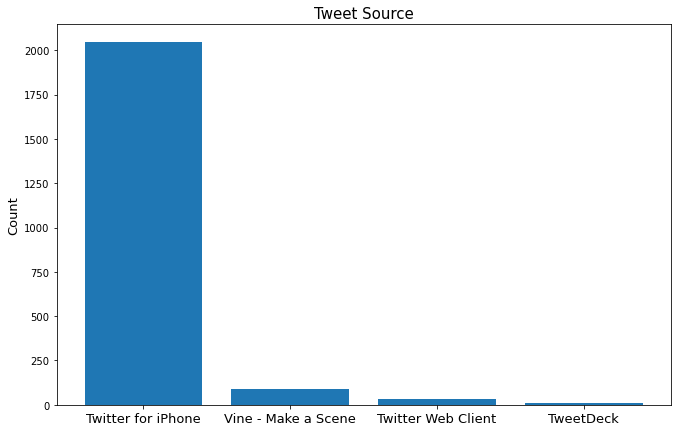

In [222]:
ind = np.arange(1, 5)
fig, ax = plt.subplots();
plt.bar(ind, source);
ax.set_xticks(ind);
ax.set_xticklabels(source.index, fontsize =13);
plt.title('Tweet Source', fontsize = 15);
plt.ylabel('Count', fontsize = 13)
fig.set_size_inches(11, 7)

### 2. Relationship between retweet_count and favorite_count


In [174]:
tweet_master = tweet_master[tweet_master['favorite_count']!=0]

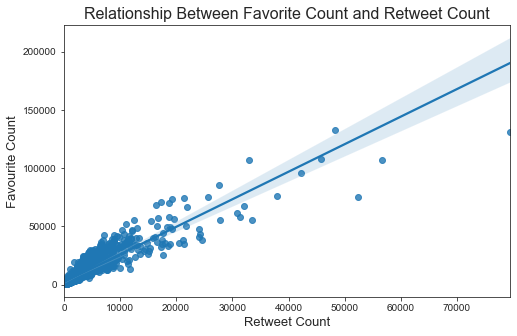

In [276]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5);
sns.regplot(x = 'retweet_count',y= 'favorite_count', data = tweet_master);
plt.title('Relationship Between Favorite Count and Retweet Count',fontsize= 16);
plt.xlabel('Retweet Count', fontsize= 13);
plt.ylabel('Favourite Count', fontsize= 13);


### 3. What dog stage has the highest retweet count and favorite count

In [245]:
stage = tweet_master[tweet_master['dog_stage']!=
                     'unknown'].groupby('dog_stage')['retweet_count',
                    'favorite_count'].mean()

stage

<ipython-input-245-0556e9f53bed>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stage = tweet_master[tweet_master['dog_stage']!=


,retweet_count,favorite_count
dog_stage,,
doggo,6348.786667,17369.093333
"doggo, floofer",3433.000000,17169.000000
"doggo, pupper",3971.200000,12077.100000
"doggo, puppo",19196.000000,47844.000000
floofer,4155.888889,11064.444444
pupper,2457.723214,7176.267857
puppo,6332.500000,20788.875000


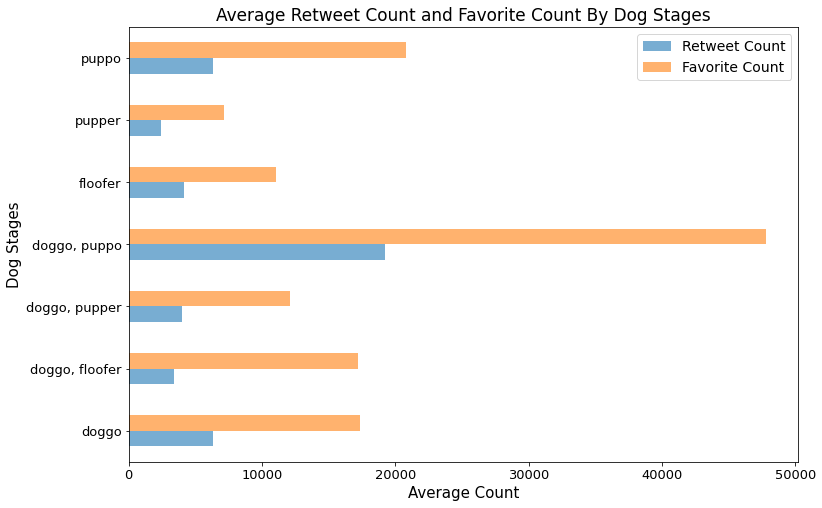

In [259]:
# Plotting the results
stage.plot.barh(width = 0.5, alpha = 0.6, figsize = (12,8))

#titles and lebels
plt.ylabel('Dog Stages', fontsize = 15)
plt.xlabel('Average Count', fontsize = 15)
plt.title('Average Retweet Count and Favorite Count By Dog Stages', fontsize = 17);
plt.yticks(fontsize = 13);
plt.xticks(fontsize = 13);
plt.legend(['Retweet Count', 'Favorite Count'],fontsize = 14);
